In [56]:
import os

results_dir = "results"
model_dirs = ["gpt4-s100-t1", "gpt3.5-s100-t1", "gpt3.5-s100-t0.5", "gpt3.5-s100-t0", "gpt3.5-s1000-t0"]

all_bleus = []
all_codebleus = []
for model_dir in model_dirs:
    model_result_dir = f"{results_dir}/{model_dir}"
    bleus_path = f"{model_result_dir}/bleus.txt"
    codebleus_path = f"{model_result_dir}/codebleus.txt"
    with open(bleus_path, "r") as f:
        bleus = f.readlines()
    with open(codebleus_path, "r") as f:
        codebleus = f.readlines()
    bleus = [(float(s.strip())*100) for s in bleus]
    codebleus = [(float(s.strip())*100) for s in codebleus]
    all_bleus.append(bleus)
    all_codebleus.append(codebleus)


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

gpt4_t1_bleu = all_bleus[0]
gpt35_t0_bleu = all_bleus[1]
gpt35_t05_bleu = all_bleus[2]
gpt35_t1_bleu = all_bleus[3]
gpt35_1k_t0_bleu = all_bleus[4]

gpt4_t1_codebleu = all_codebleus[0]
gpt35_t0_codebleu = all_codebleus[1]
gpt35_t05_codebleu = all_codebleus[2]
gpt35_t1_codebleu = all_codebleus[3]
gpt35_1k_t0_codebleu = all_codebleus[4]

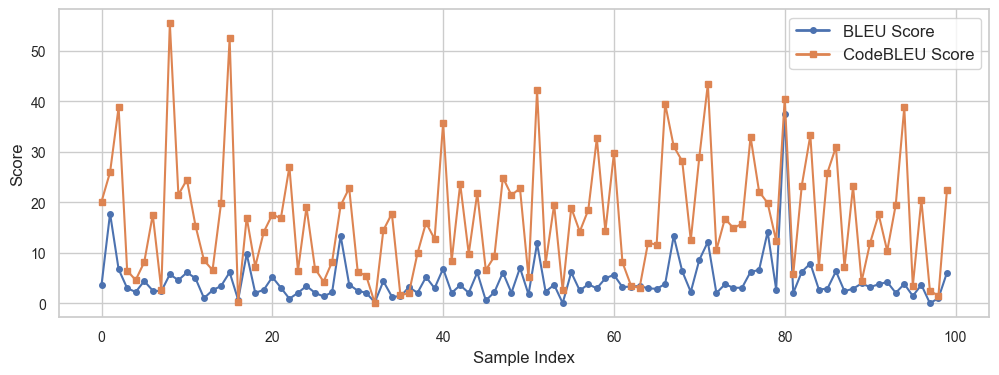

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Use a clean style for the plot
plt.figure(figsize=(12, 4))

# Add markers to make the data points more visible
plt.plot(gpt35_t1_bleu, label="BLEU Score", marker='o', markersize=4, linestyle='-')
plt.plot(gpt35_t1_codebleu, label="CodeBLEU Score", marker='s', markersize=4, linestyle='-')

# plt.title("Comparison of BLEU and CodeBLEU Scores for GPT-3.5 T=1", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Customize legend appearance
legend = plt.legend(fontsize=12, loc='best', frameon=True, facecolor='white')
frame = legend.get_lines()
plt.setp(frame, linewidth=2)

# Customize tick labels size
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

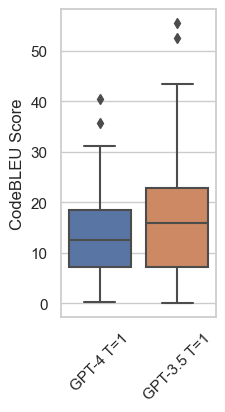

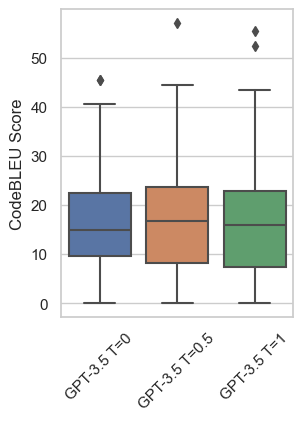

In [59]:
data = pd.DataFrame(
    {
        "GPT-4 T=1": gpt4_scores,
        "GPT-3.5 T=1": gpt35_turbo_temp1_scores,
    }
)
plt.figure(figsize=(2, 4))
sns.set(style="whitegrid")
box_plot = sns.boxplot(data=data)
plt.xticks(rotation=45)
#plt.title("Effect of Model Choice on Performance")
plt.ylabel("CodeBLEU Score")
plt.show()

data = pd.DataFrame(
    {
        "GPT-3.5 T=0": gpt35_turbo_temp0_scores,
        "GPT-3.5 T=0.5": gpt35_turbo_temp05_scores,
        "GPT-3.5 T=1": gpt35_turbo_temp1_scores,
    }
)


plt.figure(figsize=(3, 4))
sns.set(style="whitegrid")
box_plot = sns.boxplot(data=data)
plt.xticks(rotation=45)
#plt.title("Effect of Temperature on Performance")
plt.ylabel("CodeBLEU Score")
plt.show()

In [61]:
def display_stats(scores, name):
    mean = np.mean(scores)
    median = np.median(scores)
    stdev = np.std(scores)
    print(f"{name} - Mean: {mean}, Median: {median}, Standard Deviation: {stdev}")
    
display_stats(gpt35_t0_codebleu, "GPT-3.5 T=0")
display_stats(gpt35_t05_codebleu, "GPT-3.5 T=0.5")
display_stats(gpt35_t1_codebleu, "GPT-3.5 T=1")
display_stats(gpt4_t1_codebleu, "GPT-4 T=1")
display_stats(gpt35_1k_t0_codebleu, "GPT-3.5 T=0 S=1K")

GPT-3.5 T=0 - Mean: 16.421114198383197, Median: 14.791849341256352, Standard Deviation: 9.937659322115339
GPT-3.5 T=0.5 - Mean: 16.801233646827587, Median: 16.732102519618657, Standard Deviation: 11.320104793724008
GPT-3.5 T=1 - Mean: 17.10034780507467, Median: 15.88905918791164, Standard Deviation: 11.807409253492523
GPT-4 T=1 - Mean: 13.626143886211462, Median: 12.46200728768247, Standard Deviation: 8.55467737658385
GPT-3.5 T=0 S=1K - Mean: 18.01860080923525, Median: 16.763619023628817, Standard Deviation: 12.148511366679617
